In [70]:
import warnings 
warnings.filterwarnings('ignore')

# Importing required libs

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc,roc_curve

# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [71]:
# Read the dataset

# The given excel sheet in the assignment is used to create the csv file which is imported in below statement.

bankDf=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

bankDf.head()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [72]:
#Checking data types

bankDf.dtypes

ID                         int64
Age (in years)             int64
Experience (in years)      int64
Income (in K/month)        int64
ZIP Code                   int64
Family members           float64
CCAvg                    float64
Education                  int64
Mortgage                   int64
Personal Loan              int64
Securities Account         int64
CD Account                 int64
Online                     int64
CreditCard                 int64
dtype: object

In [73]:
# Basic statistical analysis

# We find that the mortgage has long left tail. It has mean of 56 while median is 0.
# We also see that Experience value minimum is -3 that means the there is some correction needed in this column value

bankDf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age (in years),5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience (in years),5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family members,4982.0,2.397230,1.147160,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [74]:
#Checking if there are any null values

# The Family member column has null values

bankDf.isnull().any()

ID                       False
Age (in years)           False
Experience (in years)    False
Income (in K/month)      False
ZIP Code                 False
Family members            True
CCAvg                    False
Education                False
Mortgage                 False
Personal Loan            False
Securities Account       False
CD Account               False
Online                   False
CreditCard               False
dtype: bool

In [75]:
# Using the median to fill the null values

bankDf=bankDf.fillna(bankDf.median())

In [76]:
bankDf.isnull().any()

ID                       False
Age (in years)           False
Experience (in years)    False
Income (in K/month)      False
ZIP Code                 False
Family members           False
CCAvg                    False
Education                False
Mortgage                 False
Personal Loan            False
Securities Account       False
CD Account               False
Online                   False
CreditCard               False
dtype: bool

In [77]:
# Checking the mortgage value counts

bankDf["Mortgage"].value_counts()

0      3462
98       17
103      16
119      16
83       16
91       16
89       16
90       15
102      15
78       15
118      14
101      14
87       14
94       14
131      14
104      14
109      13
106      13
116      13
144      13
112      13
81       13
185      12
76       12
120      12
97       12
121      12
100      12
158      11
184      11
       ... 
345       1
337       1
321       1
281       1
273       1
265       1
253       1
237       1
433       1
477       1
298       1
481       1
290       1
286       1
278       1
258       1
210       1
206       1
617       1
601       1
589       1
581       1
587       1
569       1
553       1
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [78]:
# Checking the experience value counts 
bankDf["Experience (in years)"].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience (in years), dtype: int64

In [79]:
# Experience values of -1,-2,-3 need to be corrected. Using the replace to make them 0. 

bankDf["Experience (in years)"].replace(
    to_replace=[-1,-2,-3],
    value=0,
    inplace=True
)

In [80]:
bankDf["Experience (in years)"].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
34    125
17    125
27    125
22    124
29    124
7     121
15    119
8     119
6     119
0     118
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    102
38     88
39     85
2      85
1      74
40     57
41     43
42      8
43      3
Name: Experience (in years), dtype: int64

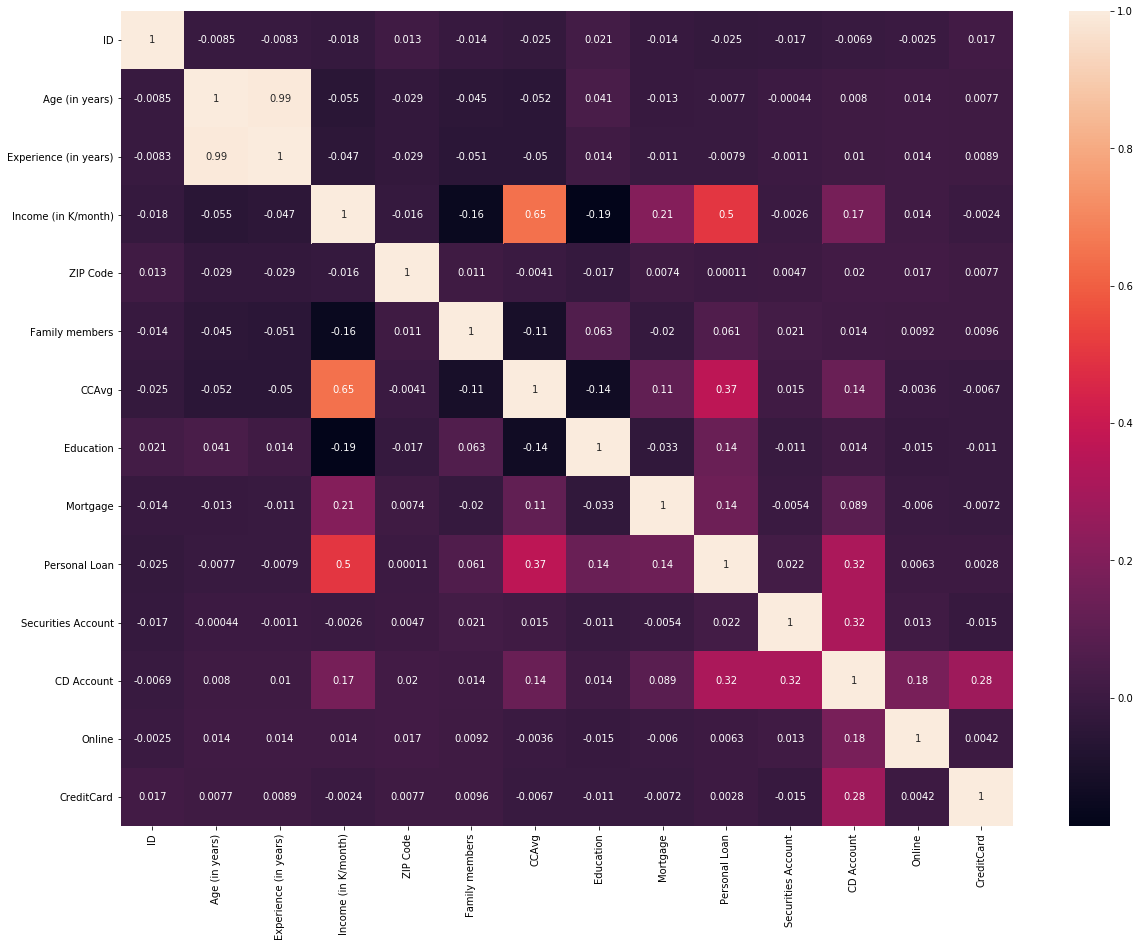

In [81]:
# Correlation

# We see that there is strong correlation in Age and Experience


plt.figure(figsize=(20, 15))

bCorr = bankDf.corr()
sns.heatmap(bCorr, 
            xticklabels = bCorr.columns.values,
            yticklabels = bCorr.columns.values,
            annot = True);

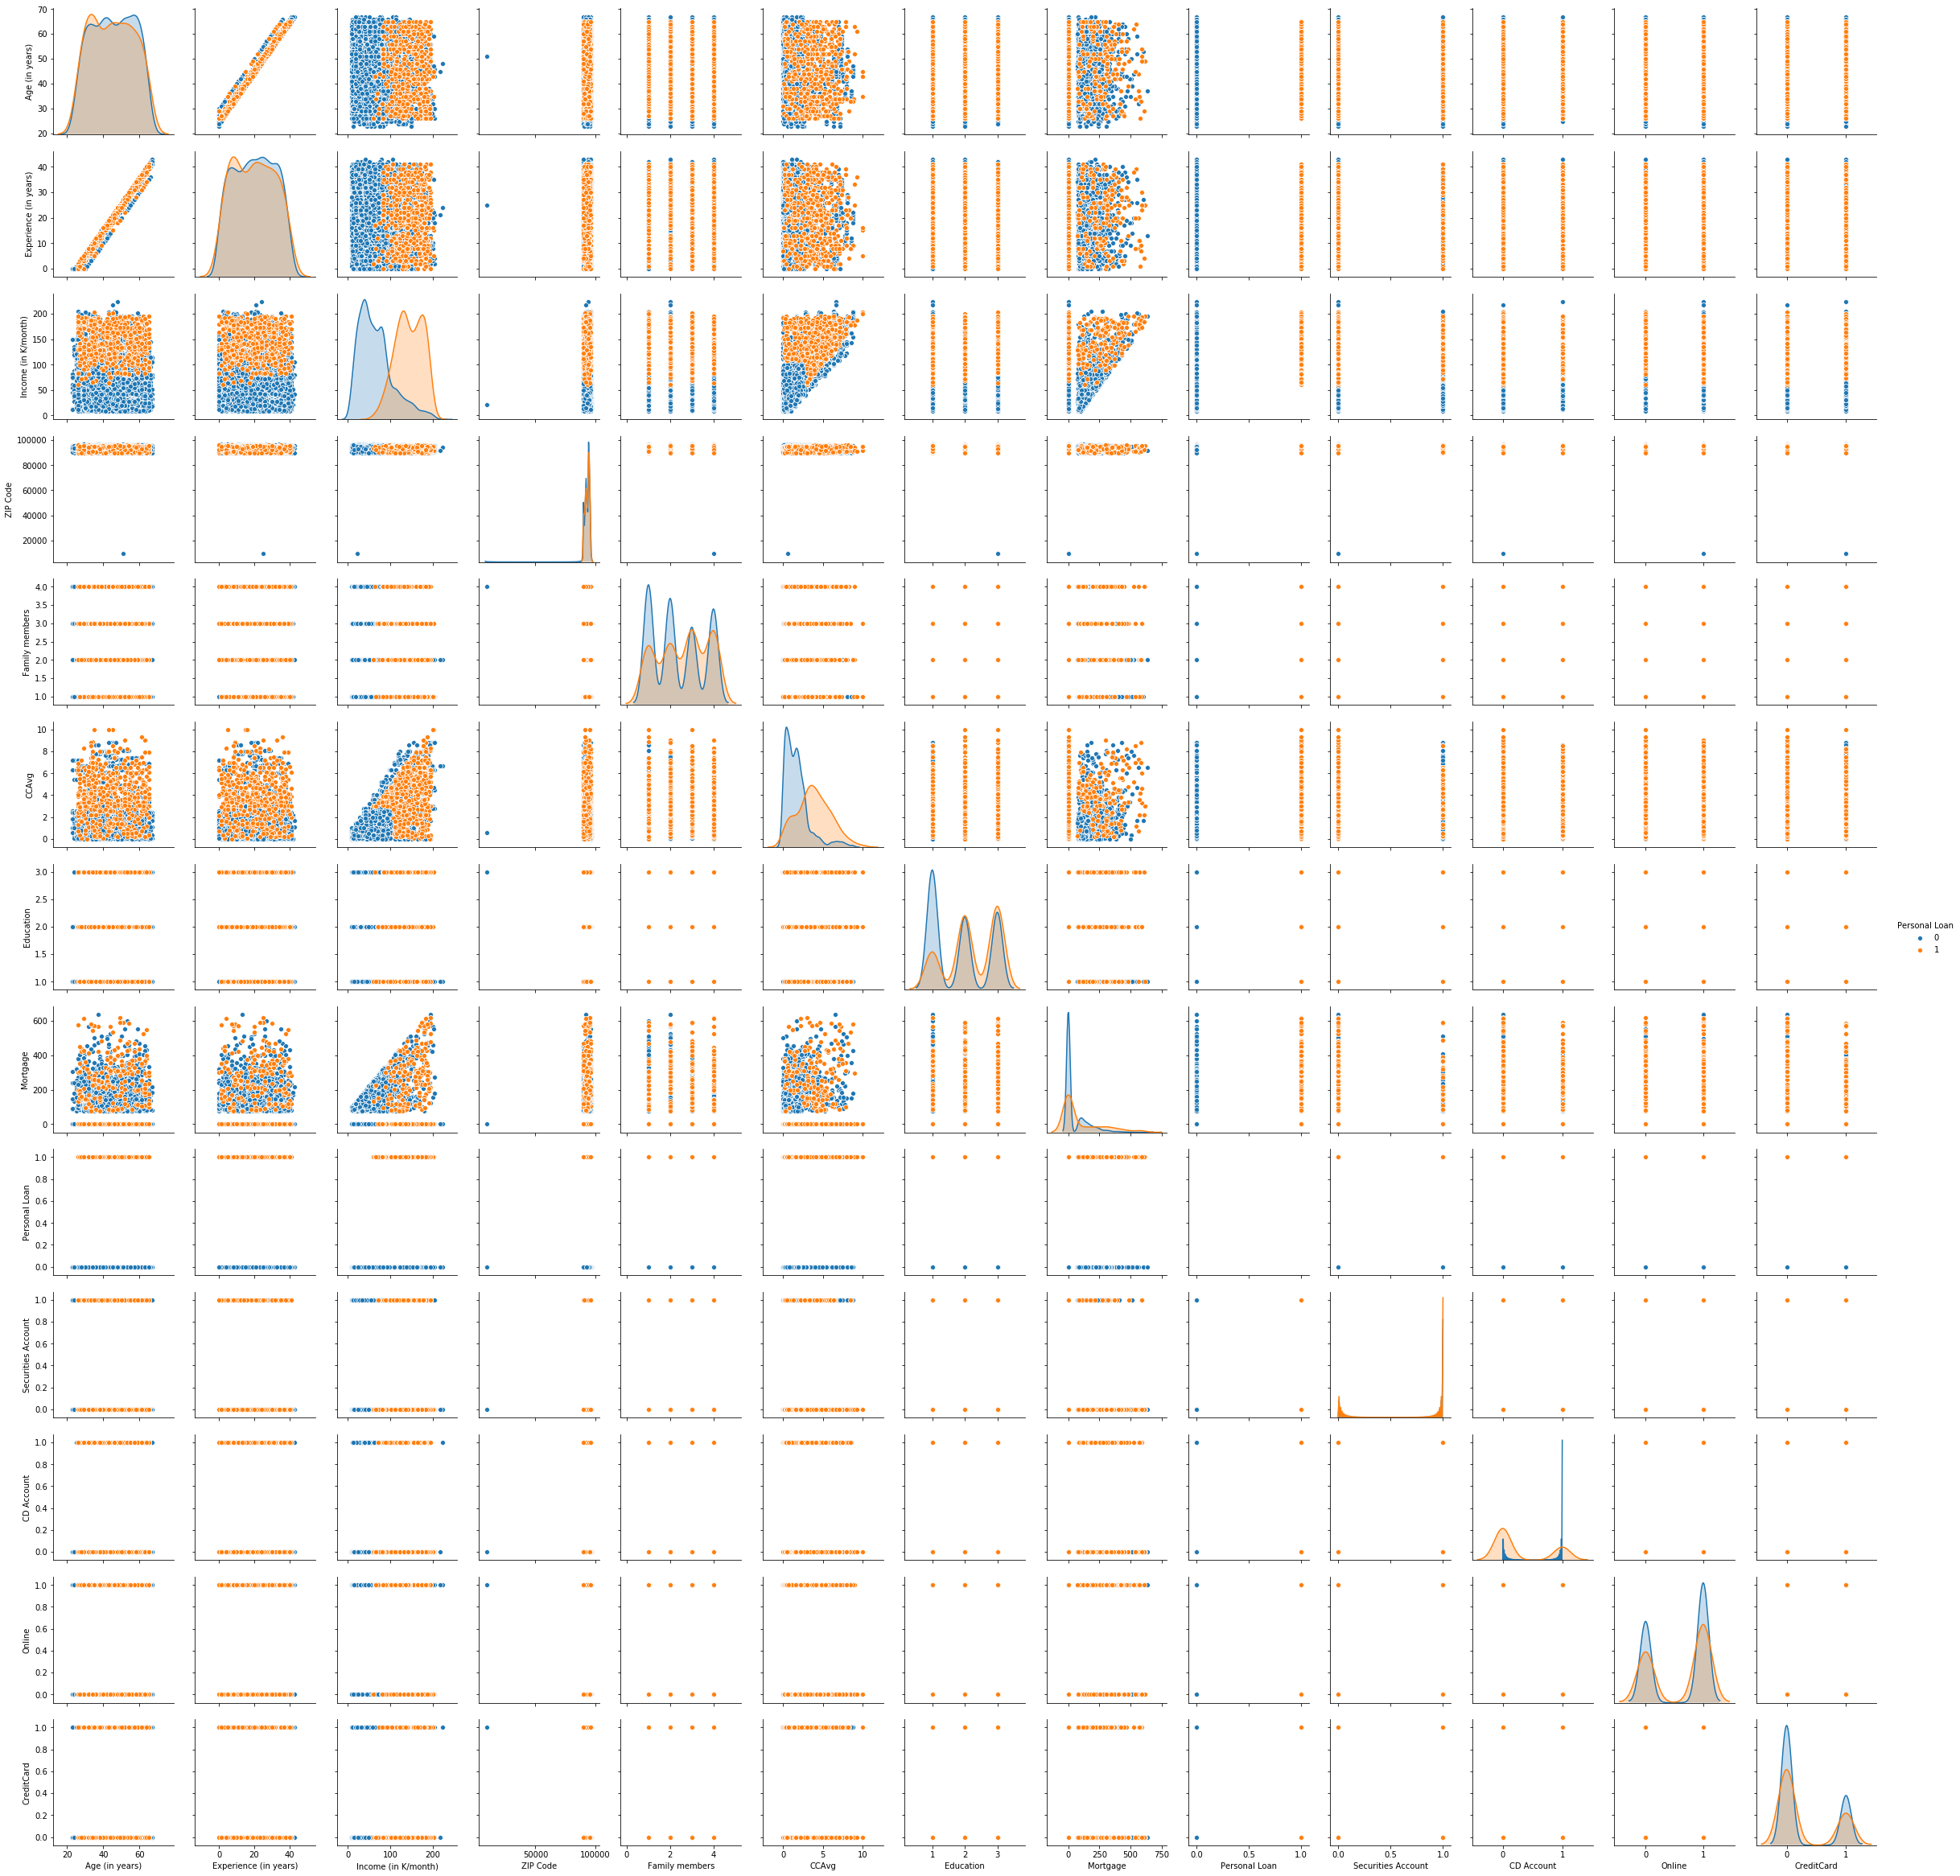

In [34]:
#Cross plots

sns.pairplot(bankDf,hue="Personal Loan")

In [89]:
# Which attributes have to be selected ?

# From the above analysis, the ID column is running number so its dropped. 
# We also see there is strong correlation between Age and Experience. So we will keep Age value for analysis and drop Experience.
# We also see there is zipcode feature. Ideally zipcode doesnt actually play role in predications but We will decide on the feature after running VIF.

# In subsequent iterations we dropped ZIPCODE too as it was having high VIF. 

bankDf.drop("ID",axis=1,inplace=True)
bankDf.drop("Experience (in years)",axis=1,inplace=True)
bankDf.drop("ZIP Code",axis=1,inplace=True)


In [90]:
X = bankDf.drop("Personal Loan", axis=1)
y = bankDf["Personal Loan"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train.head()

,Age (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
717,59,94,3.0,0.5,1,0,0,0,0,1
2496,63,32,3.0,0.7,2,141,0,0,0,0
2469,43,89,1.0,0.1,2,307,0,0,0,1
1375,50,179,1.0,2.9,3,0,0,0,0,1
2742,39,89,2.0,0.4,1,0,0,0,1,0


In [91]:
# Checking the VIF to drop the high VIF features one by one

from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X_train.values, j) for j in range(X_train.shape[1])]

# In first iteration we found age and experience and zipcode having high VIF. Dropping Experience.
# In second iteration we found that Zipcode is having high VIF. dropping Zipcode




[8.913465124546027,
 5.826884966431957,
 4.458309065980791,
 3.7008629004758116,
 5.138569267667836,
 1.3968844014345745,
 1.2893689201459437,
 1.4034407354785936,
 2.431923441092722,
 1.522824325208789]

In [92]:
#Instantiation 

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
model_score

0.9533333333333334

In [93]:
#Model score is improved from 0.918 to 0.953 by dropping  Experience / Zipcode basis correlation and VIF methods.


metrics.confusion_matrix(y_test, y_predict)

array([[1347,   15],
       [  55,   83]], dtype=int64)

In [94]:
# kNN
# To try different k's we are running thru loop

#Creating a array and loop to get the scores for K's

kList=(1,3,5,7,9,11,13,15,17,19)

#empty list to store scores
scores=[]   

# Loop thru kList to check scores
for k in kList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    score = accuracy_score(y_test, prediction)
    scores.append(score.mean())
    
# determining best k
best_k = kList[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 17


In [95]:
# Call Nearest Neighbour algorithm for K=17
NNH5 = KNeighborsClassifier(n_neighbors= 17)
NNH5.fit(X_train, y_train)

predicted_labels = NNH5.predict(X_test)

accuracy_score(y_test, predicted_labels)

0.922

In [96]:
metrics.confusion_matrix(y_test, predicted_labels)

array([[1348,   14],
       [ 103,   35]], dtype=int64)

In [ ]:
# Logistic regression has greater accuracy(0.95) than the KNN with best of k=17 ( 0.922)  model. 

# Logistic regression has improved the score basis the feature selections. 